In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

#### Análise Exploratória de Dados

In [2]:
df = pd.read_excel(r'dataset02.xlsx')

In [3]:
df.head(15)

,idade,sexo,raca,tagabismo,comorbidade1,comorbidade2,comorbidade3,comorbidade4,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,antibiotico1,antibiotico2,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
0,41,M,branca,nao,nenhuma,nenhuma,nenhum,nenhum,nenhum,fim_isolamento,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,NaN,NaN,8.0,0,4830,0.76,36.0,0,nao,leve
1,77,F,branca,sim,HAS,nenhuma,nenhum,nenhum,nenhum,fim_isolamento,hidrocortisona 100mg,prednisona 20mg,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,NaN,NaN,14.7,0,5280,0.82,31.0,0,nao,assintom
2,67,M,branca,previo,HAS,DM,nenhum,nenhum,nenhum,fim_isolamento,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,NaN,NaN,0.0,0,8650,0.72,0.0,0,nao,leve
3,51,M,branca,nao,HAS,renal-hd,nenhum,nenhum,nenhum,alta,prednisona 20mg,nenhum,nenhum,Sim,nenhum,nenhum,Nao,NaN,NaN,6.2,0,9590,0.00,142.0,0,nao,leve
4,51,M,branca,nao,HAS,renal-hd,nenhum,nenhum,nenhum,alta,"denenhumametasona 4mg/mL 2,5mL",hidrocortisona 100mg,prednisona 20mg,Nao,nenhum,nenhum,Nao,NaN,NaN,32.0,0,4230,15.40,158.0,1535,sim,assintom
5,64,F,branca,nao,HAS,nenhuma,nenhum,nenhum,nenhum,alta,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,NaN,NaN,4.1,1530,6430,1.00,52.0,0,nao,leve
6,38,M,preta,nao,renal-hd,nenhuma,nenhum,nenhum,nenhum,alta,hidrocortisona 100mg,prednisona 20mg,nenhum,Sim,"heparina 5000UI/0,25mL",nenhum,Nao,NaN,NaN,19.3,2380,1260,7.35,191.0,1021,nao,leve
7,37,M,branca,sim,HIV,oncologico,nenhum,nenhum,TVP,fim_isolamento,tiamina 300mg,piridonenhumina 40mg,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,NaN,NaN,4.8,0,4410,0.68,31.0,437,nao,leve
8,82,F,branca,nao,HAS,oncologico,nenhum,nenhum,nenhum,obito,nenhum,nenhum,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,NaN,NaN,0.0,0,0,0.00,0.0,0,nao,assintom
9,45,M,branca,nao,nenhuma,nenhuma,nenhum,nenhum,ambos,fim_isolamento,nenhum,nenhum,nenhum,Nao,"enonenhumaparina 40mg/0,4mL","enonenhumaparina 60mg/0,6mL",Sim,NaN,NaN,17.2,366,2790,1.08,22.0,0,nao,leve


Valores Vazios
- Deletar linhas/colunas vazias
- Deletar linhas que possuem valores vazios
- Preencher valores vazios (último valor)

In [4]:
# deletar linhas e colunas completamente vazias
# df = df.dropna(how='all', axis=1)

# deletar linhas que possuem pelo menos 1 valor vazio
# df = df.dropna()

In [5]:
# preencher com o último valor
df = df.ffill()

In [6]:
# deletar colunas incompletas
df = df.drop(columns='antibiotico1')
df = df.drop(columns='antibiotico2')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     429 non-null    int64  
 1   sexo                      429 non-null    object 
 2   raca                      429 non-null    object 
 3   tagabismo                 429 non-null    object 
 4   comorbidade1              429 non-null    object 
 5   comorbidade2              429 non-null    object 
 6   comorbidade3              429 non-null    object 
 7   comorbidade4              429 non-null    object 
 8   trombo_na_internacao      429 non-null    object 
 9   desfecho                  429 non-null    object 
 10  anti-inflamatorio1        429 non-null    object 
 11  anti-inflamatorio2        429 non-null    object 
 12  anti-inflamatorio3        429 non-null    object 
 13  anti-inflamatorio_previo  429 non-null    object 
 14  profilaxia

In [8]:
view_comorbidade_desfecho = df[['comorbidade1','comorbidade2','comorbidade3','comorbidade4', 'desfecho']]
display(view_comorbidade_desfecho)

,comorbidade1,comorbidade2,comorbidade3,comorbidade4,desfecho
0,nenhuma,nenhuma,nenhum,nenhum,fim_isolamento
1,HAS,nenhuma,nenhum,nenhum,fim_isolamento
2,HAS,DM,nenhum,nenhum,fim_isolamento
3,HAS,renal-hd,nenhum,nenhum,alta
4,HAS,renal-hd,nenhum,nenhum,alta
...,...,...,...,...,...
424,HAS,nenhuma,nenhum,nenhum,alta
425,nenhuma,nenhuma,nenhum,nenhum,fim_isolamento
426,DM,HAS,nenhum,nenhum,alta
427,HAS,ICC,nenhum,nenhum,UTI


In [9]:
df['desfecho']==1  # DESFECHO (1-alta/ 2-UTI/ 3-óbito/4-fim isolamento/5-transf.)

0      False
1      False
2      False
3      False
4      False
       ...  
424    False
425    False
426    False
427    False
428    False
Name: desfecho, Length: 429, dtype: bool

#### Atributos escolhidos: 

In [10]:
nomes_atributos_numericos = ['idade','proteina c (mg/dl)','ferritina (ng/ml)','leucócitos ( /ul)','creatinina (mg/dl)','ureia(mg/dl)','d-dimeros (ng/ml)']

In [11]:
nomes_atributos_numericos

['idade',
 'proteina c (mg/dl)',
 'ferritina (ng/ml)',
 'leucócitos ( /ul)',
 'creatinina (mg/dl)',
 'ureia(mg/dl)',
 'd-dimeros (ng/ml)']

In [12]:
nomes_atributos_categoricos = ['sexo','sintomas','raca','tagabismo','comorbidade1','comorbidade2','comorbidade3','comorbidade4','trombo_na_internacao','sintomas','anti-inflamatorio_previo','anticoagulante_previo','reinfeccao']

In [13]:
nomes_atributos_categoricos

['sexo',
 'sintomas',
 'raca',
 'tagabismo',
 'comorbidade1',
 'comorbidade2',
 'comorbidade3',
 'comorbidade4',
 'trombo_na_internacao',
 'sintomas',
 'anti-inflamatorio_previo',
 'anticoagulante_previo',
 'reinfeccao']

In [14]:
df['desfecho'].value_counts()

alta              243
UTI                89
fim_isolamento     47
obito              47
transf              3
Name: desfecho, dtype: int64

In [15]:
df = df.drop(df[df['desfecho'] == 'transf'].index)

In [16]:
val_cnt = df['desfecho'].value_counts()
min_sample = val_cnt.min()
print(min_sample) # Outputs 7 in as an example
df = df.groupby('desfecho').apply(lambda s: s.sample(min_sample))
print(df)

47
              idade sexo    raca tagabismo comorbidade1 comorbidade2  \
desfecho                                                               
UTI      395     34    F  branca       nao          ICC     renal-hd   
         92      52    M  branca       nao          ICC      nenhuma   
         285     44    M  branca       nao      nenhuma      nenhuma   
         287     43    M  branca       nao    obesidade      nenhuma   
         152     61    M  branca       sim           DM          HAS   
...             ...  ...     ...       ...          ...          ...   
obito    48      63    F  branca    previo           DM          HAS   
         49      61    F  branca       nao          HAS   oncologico   
         121     92    F  branca    previo           DM      nenhuma   
         305     64    M  branca       sim   oncologica      nenhuma   
         133     91    M  branca       nao           DM          HAS   

             comorbidade3 comorbidade4 trombo_na_internacao 

In [17]:
df['desfecho'].mask(df['desfecho'] == 'alta', 0, inplace=True)
df['desfecho'].mask(df['desfecho'] == 'UTI', 1, inplace=True)
df['desfecho'].mask(df['desfecho'] == 'fim_isolamento', 2, inplace=True)
df['desfecho'].mask(df['desfecho'] == 'obito', 3, inplace=True)

#### Pré-Processamento

#### Separando os conjuntos de treino e teste

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

pipeline_atr_numericos = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo = ColumnTransformer([
    ('numericos',   pipeline_atr_numericos, nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(),        nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

df_labels = df['desfecho'].copy()
df_features = df.drop(columns='desfecho')

# pre-processamento do conjunto de treino
df_features = preproc_completo.fit_transform(df_features)

# pre-processamento da coluna alvo para treino

df_labels = tf.keras.utils.to_categorical(df_labels, 4)



In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

# separando os conjuntos de dados de treino e teste

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=213)

sss.get_n_splits(df_features, df_labels)

for train_index, test_index in sss.split(df_features, df_labels):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_treino, X_teste = df_features[train_index], df_features[test_index]
    y_treino, y_teste = df_labels[train_index], df_labels[test_index]

TRAIN: [128  24 164  16  85  55 163 145  41 132  15  58  61  97  19 160  27 171
 109 130  96 178 143  30  73 141 126 136 169  69  64 168 186 156 120 117
  12  63 187  92   1  90  44 165 114 140  40  53  91  99  76  49 101   5
 112  98  50 111 151 172  48  20  77  36 108  60 119  45 152  62  32 167
  23  86  87  39  11  80   4  54 135  81  31 116 170   8  84 122  94   7
 161 183  95  70  18 115  71  38  46 162 149 146  21 174  52  34   9 153
 133 124 185 173   3 106 181  88 105  59 157  78 158 154  29  72  14 118
 148 139 113  47 137 125 102 155 100 175 177 179  66  43  35  79  83  28
   2  25  89 138 110   6] TEST: [127 134 142  13 182  17  37  67 107 129  51  26 184  68  22 131 104 147
  56 123  57 150  33  10  82  93  65  74 144  75 159 166 103   0 180 121
  42 176]


In [21]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100
train_dataset = tf.data.Dataset.from_tensor_slices((X_treino, y_treino))
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_teste, y_teste))
test_dataset = test_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [22]:
X_treino[0]

array([-0.05712077,  1.94282987, -0.23562082, -0.14969269, -0.43909398,
       -0.2792736 , -0.58648952,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ])

In [23]:
X_treino

array([[-0.05712077,  1.94282987, -0.23562082, ...,  1.        ,
         1.        ,  0.        ],
       [-0.38585663, -0.21880405, -0.23562082, ...,  1.        ,
         1.        ,  0.        ],
       [-0.55022456,  1.16427528,  0.20417612, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.15290698,  2.23593277, -0.23562082, ...,  0.        ,
         1.        ,  0.        ],
       [-0.49543525, -0.79585039, -0.23562082, ...,  0.        ,
         1.        ,  0.        ],
       [-0.44064594, -0.20048511, -0.23562082, ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
X_treino.shape

(150, 59)

In [25]:
y_treino.shape

(150, 4)

In [26]:
X_teste.shape

(38, 59)

In [27]:
y_teste.shape

(38, 4)

- RNA TensorFlow + Keras

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
# Qual o tamanho da entrada?
X_treino.shape[1:]

(59,)

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation="relu",input_shape=X_treino.shape[1:]))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(4, activation="softmax"))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3840      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 6,052
Trainable params: 6,052
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Para modelos de classificação com saída esparsa:    # para classificação com saída densa  # para classificação binária:     
model.compile(loss='categorical_crossentropy', # usar categorical_crossentropy       # usar binary_crossentropy e mudar
              optimizer="adam",                        #                                     # a ativação da camada de saída
              metrics=["accuracy",tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])                   #                                     # para sigmoid


#### Treinamento do modelo

In [33]:
history = model.fit(X_treino, y_treino, epochs=25, validation_split=0.2)

Epoch 1/25
4/4 [==============================] - 1s 126ms/step - loss: 1.4713 - accuracy: 0.2000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4525 - val_accuracy: 0.3000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
4/4 [==============================] - 0s 5ms/step - loss: 1.4040 - accuracy: 0.2417 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4183 - val_accuracy: 0.3000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
4/4 [==============================] - 0s 5ms/step - loss: 1.3530 - accuracy: 0.2750 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3914 - val_accuracy: 0.3667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
4/4 [==============================] - 0s 4ms/step - loss: 1.3048 - accuracy: 0.3917 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3662 - val_accuracy: 0.3667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
4/4 [==============================] - 0s 5

#### Avaliação da evolução do treinamento

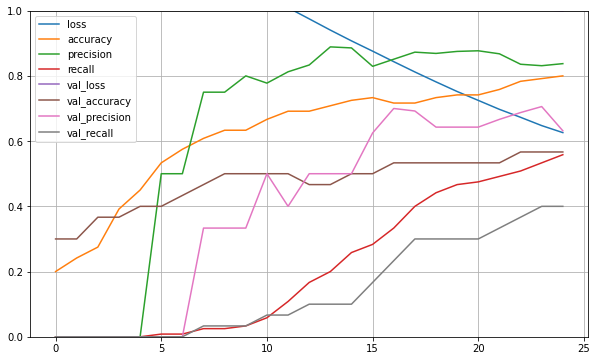

In [34]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Avaliação do desempenho do modelo treinado

In [35]:
y_previsto_rna_proba = model.evaluate(test_dataset)

1/1 [==============================] - 0s 216ms/step - loss: 1.0319 - accuracy: 0.5263 - precision: 0.6538 - recall: 0.4474


In [36]:
np.round(y_previsto_rna_proba,decimals=2)

array([1.03, 0.53, 0.65, 0.45])